In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [2]:
initial = pd.read_csv('C:/users/rusty/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [3]:
ps = initial[['Date', 'Morph', 'cell type', 'Slice (Lims ID?)', 'SM_QC_PF', 'Bad dates']]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['Bad dates'] = ps['Bad dates'].astype('category')
ps['cell type'] = ps['cell type'].astype('category')
ps = ps[ps['Bad dates'] != 'x']
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps = ps[ps['cell type'] == 'tdt+']
ps.dropna(subset = ['Morph', 'cell type'], inplace =  True)
ps.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,Date,Morph,cell type,Slice (Lims ID?),SM_QC_PF,Bad dates
70,2017-01-09,y,tdt+,Rbp4-Cre_KL100;Ai14-290392.04.02,pass,NaN
71,2017-01-09,n,tdt+,Rbp4-Cre_KL100;Ai14-290392.04.02,fail,NaN
77,2017-01-10,n,tdt+,Rbp4-Cre_KL100;Ai14-290393.03.02,pass,NaN
78,2017-01-10,y,tdt+,Rbp4-Cre_KL100;Ai14-290393.03.02,pass,NaN
79,2017-01-10,n,tdt+,Rbp4-Cre_KL100;Ai14-290393.04.02,pass,NaN


In [4]:
ps['Morph'].value_counts()

n             1223
y              493
q              325
na              62
z               22
processing      20
?                2
 n               1
Name: Morph, dtype: int64

In [5]:
ps = ps.drop('Bad dates', 1)
ps = ps.drop('Date', 1)
ps = ps.drop('cell type', 1)
ps = ps.drop('SM_QC_PF', 1)
ps.head()

,Morph,Slice (Lims ID?)
70,y,Rbp4-Cre_KL100;Ai14-290392.04.02
71,n,Rbp4-Cre_KL100;Ai14-290392.04.02
77,n,Rbp4-Cre_KL100;Ai14-290393.03.02
78,y,Rbp4-Cre_KL100;Ai14-290393.03.02
79,n,Rbp4-Cre_KL100;Ai14-290393.04.02


In [6]:
ps['Cre_line'] = ps['Slice (Lims ID?)'].str[:-18]
ps = ps.drop('Slice (Lims ID?)', 1)
ps.head()

,Morph,Cre_line
70,y,Rbp4-Cre_KL100
71,n,Rbp4-Cre_KL100
77,n,Rbp4-Cre_KL100
78,y,Rbp4-Cre_KL100
79,n,Rbp4-Cre_KL100


In [7]:
y = ps[ps['Morph'] == 'y']
y["morpho_call"] = "y"
n = ps[ps['Morph'] == 'n']
n['morpho_call'] = 'n'
q = ps[ps['Morph'] == 'q']
q['morpho_call'] = 'q'
frames = [y, n, q]
morphpp = pd.concat(frames)
morphpp

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,Morph,Cre_line,morpho_call
70,y,Rbp4-Cre_KL100,y
78,y,Rbp4-Cre_KL100,y
111,y,Slc32a1-IRES-Cre,y
112,y,Slc32a1-IRES-Cre,y
113,y,Slc32a1-IRES-Cre,y
117,y,Slc32a1-IRES-Cre,y
127,y,Gad2-IRES-Cre,y
129,y,Gad2-IRES-Cre,y
135,y,Gad2-IRES-Cre,y
136,y,Gad2-IRES-Cre,y


In [8]:
#for creline in ps['Cre_line']:
    #if creline.endswith(';A'):
        #ps['Cre_line'] = ps['Slice (Lims ID?)'].str[:-2]
#ps['Cre_line'].value_counts()       

In [9]:
types = {'Chat-IRES-Cre-neo': 'inhibitory', 
       'Chrna2-Cre_OE25': 'inhibitory', 
       'Ctgf-T2A-dgCre': 'excitatory', 
       'Cux2-CreERT2': 'excitatory',
       'Gad2-IRES-Cre': 'inhibitory',
       'Glt25d2-Cre_NF107': 'excitatory',
       'Htr3a-Cre_NO152': 'inhibitory',
       'Htr3a-Cre_NO152;Pvalb-T2A-Dre': 'inhibitory',
       'Ndnf-IRES2-dgCre': 'inhibitory',
       'Nkx2-1-CreERT2': 'inhibitory',
       'Nos1-CreERT2;Sst-IRES-FlpO': 'inhibitory',
       'Nr5a1-Cre': 'excitatory',
       'Oxtr-T2A-Cre': 'mix',
       'Pdyn-T2A-CreERT2': 'unknown',
       'Pvalb-IRES-Cre': 'inhibitory',
       'Rbp4-Cre_KL100': 'excitatory',
       'Rorb-IRES2-Cre': 'excitatory',
       'Rorb-IRES2-Cre-neo': 'excitatory',
       'Scnn1a-Tg2-Cre': 'excitatory',
       'Scnn1a-Tg3-Cre': 'excitatory',
       'Sim1-Cre_KJ18': 'excitatory',
       'Slc17a8-IRES2-Cre': 'excitatory',
       'Slc32a1-IRES-Cre': 'inhibitory',
       'Sst-IRES-Cre': 'inhibitory',
       'Vip-IRES-Cre': 'inhibitory',
       'Vipr2-IRES2-Cre-neo': 'inhibitory',
       'Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO': 'inhibitory'}

morphpp['type'] = morphpp['Cre_line'].map(types)

In [10]:
ps1 = morphpp.groupby(['type'])

In [11]:
exc = ps1.get_group('excitatory')
inhib = ps1.get_group('inhibitory')

In [12]:
excite = exc.groupby(['Cre_line', 'morpho_call']).count()
excite = excite.reset_index()
excite = excite.pivot_table(values=['Morph'],
                            index=['Cre_line'],
                            columns='morpho_call',
                            aggfunc='sum', fill_value=0)
excited = excite.div(excite.sum(1), axis=0)*100
excited

Morph                      
morpho_call                 n          q          y
Cre_line                                           
Ctgf-T2A-dgCre      22.222222  44.444444  33.333333
Cux2-CreERT2        70.270270  21.621622   8.108108
Nr5a1-Cre           53.703704  14.814815  31.481481
Rbp4-Cre_KL100      42.000000  13.200000  44.800000
Rorb-IRES2-Cre      56.807512   9.859155  33.333333
Rorb-IRES2-Cre-neo  43.137255  23.529412  33.333333
Scnn1a-Tg2-Cre      52.631579  15.789474  31.578947
Scnn1a-Tg3-Cre      50.000000  11.904762  38.095238
Sim1-Cre_KJ18       44.444444  27.777778  27.777778

In [13]:
excite

Morph         
morpho_call            n   q    y
Cre_line                         
Ctgf-T2A-dgCre         2   4    3
Cux2-CreERT2          26   8    3
Nr5a1-Cre             29   8   17
Rbp4-Cre_KL100       105  33  112
Rorb-IRES2-Cre       121  21   71
Rorb-IRES2-Cre-neo    22  12   17
Scnn1a-Tg2-Cre        10   3    6
Scnn1a-Tg3-Cre        21   5   16
Sim1-Cre_KJ18          8   5    5

In [14]:
excite_totals = list(excite.sum(1))
excite_totals

[9, 37, 54, 250, 213, 51, 19, 42, 18]

In [15]:
inhibit = inhib.groupby(['Cre_line', 'morpho_call']).count()
inhibit = inhibit.reset_index()
inhibit = inhibit.pivot_table(values=['Morph'], 
                              index=['Cre_line'], 
                              columns='morpho_call',
                              aggfunc='sum', fill_value=0)
inhibited = inhibit.div(inhibit.sum(1), axis=0)*100
inhibited

Morph                      
morpho_call                               n          q          y
Cre_line                                                         
Chat-IRES-Cre-neo                 61.538462  23.076923  15.384615
Chrna2-Cre_OE25                   64.197531  20.987654  14.814815
Gad2-IRES-Cre                     76.381910  13.065327  10.552764
Htr3a-Cre_NO152                   44.000000  28.000000  28.000000
Htr3a-Cre_NO152;Pvalb-T2A-Dre     78.571429  14.285714   7.142857
Ndnf-IRES2-dgCre                  68.152866   7.643312  24.203822
Nos1-CreERT2;Sst-IRES-FlpO        10.000000  20.000000  70.000000
Pvalb-IRES-Cre                    68.656716  17.910448  13.432836
Slc32a1-IRES-Cre                  69.858156  20.567376   9.574468
Sst-IRES-Cre                      38.372093  18.604651  43.023256
Vip-IRES-Cre                      62.857143  19.591837  17.551020
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO  80.392157   1.960784  17.647059

In [16]:
inhibit

Morph        
morpho_call                          n   q   y
Cre_line                                      
Chat-IRES-Cre-neo                    8   3   2
Chrna2-Cre_OE25                     52  17  12
Gad2-IRES-Cre                      152  26  21
Htr3a-Cre_NO152                     11   7   7
Htr3a-Cre_NO152;Pvalb-T2A-Dre       11   2   1
Ndnf-IRES2-dgCre                   107  12  38
Nos1-CreERT2;Sst-IRES-FlpO           1   2   7
Pvalb-IRES-Cre                      46  12   9
Slc32a1-IRES-Cre                   197  58  27
Sst-IRES-Cre                        33  16  37
Vip-IRES-Cre                       154  48  43
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO    41   1   9

In [17]:
inhibit_totals = list(inhibit.sum(1))
inhibit_totals

[13, 81, 199, 25, 14, 157, 10, 67, 282, 86, 245, 51]

In [18]:
exc_names = sorted(list(exc.Cre_line.unique()))
exc_yes = list(excited['Morph', 'y'])
exc_quest = list(excited['Morph', 'q'])
exc_no = list(excited['Morph', 'n'])

inhib_names = sorted(list(inhib.Cre_line.unique()))
inhib_yes = list(inhibited['Morph', 'y'])
inhib_quest = list(inhibited['Morph', 'q'])
inhib_no = list(inhibited['Morph', 'n'])

all_names = exc_names + inhib_names
all_names
all_groups = len(all_names)
all_index = np.arange(all_groups)

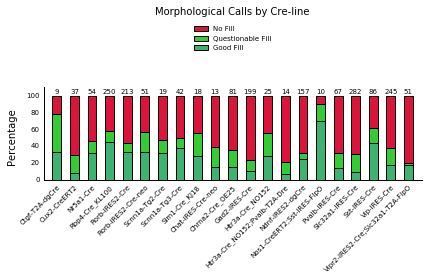

In [28]:
exc_group = len(exc_names)
exc_index = np.arange(exc_group)
inhib_group = len(inhib_names)
inhib_index = (np.arange(inhib_group)+exc_group)

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(0,110)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
barWidth = 0.5

exc_y = plt.bar(exc_index, exc_yes, color='mediumseagreen', width=barWidth)
exc_q = plt.bar(exc_index, exc_quest, color='limegreen', bottom=exc_yes, width=barWidth)
exc_n = plt.bar(exc_index, exc_no, color='crimson', bottom=[i+j for i,j in zip(exc_yes, exc_quest)], 
                width=barWidth)
for yes, total in zip(exc_y, excite_totals):
    ax.text(yes.get_x()+yes.get_width()/2, 101, total, ha='center', va='bottom', fontsize=7)

inhib_y = plt.bar(inhib_index, inhib_yes, color='mediumseagreen', width=barWidth)
inhib_q = plt.bar(inhib_index, inhib_quest, color='limegreen', bottom=inhib_yes, width=barWidth)
inhib_n = plt.bar(inhib_index, inhib_no, color='crimson', 
                  bottom=[i+j for i,j in zip(inhib_yes, inhib_quest)], width=barWidth)
for no, total in zip(inhib_n, inhibit_totals):
    ax.text(no.get_x()+no.get_width()/2, 101, total, ha='center', va='bottom', fontsize=7)
    
axes = plt.gca()
plt.ylabel('Percentage', size=10)
ax.yaxis.set_label_coords(-0.07,0.27)
plt.xticks(all_index+0.5, all_names, rotation=45, size=7, ha='right')
plt.yticks([0,20,40,60,80,100], size=7)
axes.set_xlim([-0.5, 21])
axes.set_ylim([0,190])
leg = plt.legend((exc_n, exc_q, exc_y),
                 ('No Fill', 'Questionable Fill', 'Good Fill'),
                  ncol=1, prop={'size':7}, loc='upper center', frameon=False)
#leg.set_title('Morphological calls')
#leg.get_title().set_position((-14,0))
plt.title('Morphological Calls by Cre-line', fontsize='10')
plt.tight_layout()
fig.savefig('morpho_calls_by_creline', dpi=300)

In [ ]:
#exc_y = plt.bar(exc_index, exc_yes, color='royalblue', width=barWidth)
#exc_q = plt.bar(exc_index, exc_quest, color='green', bottom=exc_yes, width=barWidth)
#exc_n = plt.bar(exc_index, exc_no, color='tomato', bottom=[i+j for i,j in zip(exc_yes, exc_quest)], 
                #width=barWidth)

#inhib_y = plt.bar(inhib_index, inhib_yes, color='mediumblue', width=barWidth)
#inhib_q = plt.bar(inhib_index, inhib_quest, color='darkgreen', bottom=inhib_yes, width=barWidth)
#inhib_n = plt.bar(inhib_index, inhib_no, color='firebrick', 
                  #bottom=[i+j for i,j in zip(inhib_yes, inhib_quest)], width=barWidth)

In [ ]:
#leg = plt.legend((exc_n, exc_q, exc_y, inhib_n, inhib_q, inhib_y),
                 #('           no', '   questionable', '          yes','','',''),
                  #ncol=2, prop={'size':7}, loc='upper center', frameon=False)
#leg.set_title('Excitatory                    Inhibitory', prop={'size':7})